In [77]:
import os
import pandas as pd
import numpy as np
import re
import pylab as pl

% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
os.getenv('PUIDATA')

'/home/cusp/ttd255/PUIdata'

In [4]:
data = pd.read_csv('/projects/open/NYCOpenData/nycopendata/data/erm2-nwe9/1446832678/erm2-nwe9')

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8,17,39,40,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
data.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [7]:
len(data)

10187766

In [8]:
print(len(data['Community Board'].unique()))
data['Community Board'].unique()

77


array(['13 BROOKLYN', '0 Unspecified', '18 BROOKLYN', '12 BROOKLYN',
       '02 STATEN ISLAND', '08 MANHATTAN', '06 BROOKLYN', '10 BRONX',
       '06 MANHATTAN', '04 BROOKLYN', '04 QUEENS', '09 MANHATTAN',
       '14 BROOKLYN', '05 MANHATTAN', '02 MANHATTAN', '10 QUEENS',
       '07 QUEENS', '02 QUEENS', '11 BROOKLYN', '05 QUEENS', '05 BROOKLYN',
       '09 QUEENS', '12 MANHATTAN', '01 BROOKLYN', '11 MANHATTAN',
       '03 BRONX', '03 STATEN ISLAND', '08 BROOKLYN', '03 BROOKLYN',
       '07 MANHATTAN', '10 MANHATTAN', '04 BRONX', '01 MANHATTAN',
       '07 BRONX', '09 BRONX', '03 MANHATTAN', '13 QUEENS', '02 BRONX',
       '12 QUEENS', '16 BROOKLYN', '08 QUEENS', '04 MANHATTAN',
       '14 QUEENS', '10 BROOKLYN', '11 QUEENS', '06 BRONX', '08 BRONX',
       '05 BRONX', '15 BROOKLYN', '02 BROOKLYN', '12 BRONX', '03 QUEENS',
       '06 QUEENS', '01 STATEN ISLAND', '01 BRONX', '01 QUEENS',
       '17 BROOKLYN', '11 BRONX', 'Unspecified QUEENS', '09 BROOKLYN',
       'Unspecified MANHATTAN'

In [6]:
data['Unspecified'] = np.where(data['Community Board'].str.contains\
                               ('Unspecified|64|81|55|83|28|80|26|95|82|27|56|84') == True, 'yes', 'no')

In [7]:
data['Unspecified'].head(3)

0     no
1    yes
2     no
Name: Unspecified, dtype: object

In [8]:
data[data['Unspecified'] == 'no']['Community Board'].unique()

array(['13 BROOKLYN', '18 BROOKLYN', '12 BROOKLYN', '02 STATEN ISLAND',
       '08 MANHATTAN', '06 BROOKLYN', '10 BRONX', '06 MANHATTAN',
       '04 BROOKLYN', '04 QUEENS', '09 MANHATTAN', '14 BROOKLYN',
       '05 MANHATTAN', '02 MANHATTAN', '10 QUEENS', '07 QUEENS',
       '02 QUEENS', '11 BROOKLYN', '05 QUEENS', '05 BROOKLYN', '09 QUEENS',
       '12 MANHATTAN', '01 BROOKLYN', '11 MANHATTAN', '03 BRONX',
       '03 STATEN ISLAND', '08 BROOKLYN', '03 BROOKLYN', '07 MANHATTAN',
       '10 MANHATTAN', '04 BRONX', '01 MANHATTAN', '07 BRONX', '09 BRONX',
       '03 MANHATTAN', '13 QUEENS', '02 BRONX', '12 QUEENS', '16 BROOKLYN',
       '08 QUEENS', '04 MANHATTAN', '14 QUEENS', '10 BROOKLYN',
       '11 QUEENS', '06 BRONX', '08 BRONX', '05 BRONX', '15 BROOKLYN',
       '02 BROOKLYN', '12 BRONX', '03 QUEENS', '06 QUEENS',
       '01 STATEN ISLAND', '01 BRONX', '01 QUEENS', '17 BROOKLYN',
       '11 BRONX', '09 BROOKLYN', '07 BROOKLYN'], dtype=object)

In [12]:
len(data[data['Unspecified'] == 'no']['Community Board'].unique())

59

In [10]:
data_dup = data.duplicated()

KeyboardInterrupt: 

In [20]:
data_dup[data_dup == True]

Series([], dtype: bool)

In [16]:
ukey_dup = data['Unique Key'].duplicated(keep = 'first')

In [39]:
ukey_dup2 = data['Unique Key'].duplicated(keep = 'last')

In [42]:
data[ukey_dup == True]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Unspecified
4248298,26003579,07/26/2013 12:00:00 AM,08/06/2013 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,1-2 Family Dwelling,10302,131 HARRISON AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.636835,-74.138796,"(40.63683487948972, -74.13879629882382)",no
4253082,26020434,07/25/2013 12:00:00 AM,08/05/2013 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,1-2 Family Dwelling,10462,1909 BARNES AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.848845,-73.863631,"(40.8488451919449, -73.86363125763393)",no
4253086,26012011,07/25/2013 12:00:00 AM,08/06/2013 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11225,440 BROOKLYN AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.664148,-73.945482,"(40.66414769632634, -73.94548172836168)",no
4253091,26002968,07/25/2013 12:00:00 AM,08/06/2013 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,1-2 Family Dwelling,11237,406 SUYDAM STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.705703,-73.920175,"(40.705702500630075, -73.92017516512333)",no
4253092,26020332,07/25/2013 12:00:00 AM,08/06/2013 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Other (Explain Below),11213,780 ST MARKS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.675023,-73.946814,"(40.67502312706964, -73.94681393618372)",no
4253095,26033513,07/25/2013 12:00:00 AM,08/06/2013 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,1-2 Family Dwelling,10302,60 AVENUE B,...,NaN,NaN,NaN,NaN,NaN,NaN,40.636351,-74.129806,"(40.63635131789832, -74.12980576711388)",no
4253097,26011524,07/25/2013 12:00:00 AM,08/02/2013 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,10031,1484 AMSTERDAM AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.817860,-73.953008,"(40.817859804380014, -73.95300779968848)",no
4253098,26011777,07/25/2013 12:00:00 AM,08/06/2013 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Other (Explain Below),11221,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.691219,-73.939679,"(40.6912192567118, -73.93967921077531)",no
4253100,26011611,07/25/2013 12:00:00 AM,08/02/2013 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,10467,2309 HOLLAND AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.859953,-73.865586,"(40.85995256353461, -73.86558595844559)",no
4253101,26028900,07/25/2013 12:00:00 AM,08/06/2013 10:54:57 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,1-2 Family Dwelling,10302,22 JEWETT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.636904,-74.128820,"(40.63690412970023, -74.12881960785445)",no


In [40]:
data[ukey_dup2 == True]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Unspecified
4248297,26003579,07/26/2013 12:00:00 AM,08/06/2013 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,1-2 Family Dwelling,10302,131 HARRISON AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.636835,-74.138796,"(40.63683487948972, -74.13879629882382)",no
4253070,26033513,07/25/2013 12:00:00 AM,08/06/2013 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,1-2 Family Dwelling,10302,60 AVENUE B,...,NaN,NaN,NaN,NaN,NaN,NaN,40.636351,-74.129806,"(40.63635131789832, -74.12980576711388)",no
4253073,26033604,07/25/2013 12:00:00 AM,08/06/2013 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11225,456 BROOKLYN AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.663665,-73.945529,"(40.66366463760264, -73.94552898151792)",no
4253074,26002968,07/25/2013 12:00:00 AM,08/06/2013 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,1-2 Family Dwelling,11237,406 SUYDAM STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.705703,-73.920175,"(40.705702500630075, -73.92017516512333)",no
4253076,26020332,07/25/2013 12:00:00 AM,08/06/2013 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Other (Explain Below),11213,780 ST MARKS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.675023,-73.946814,"(40.67502312706964, -73.94681393618372)",no
4253077,26011682,07/25/2013 12:00:00 AM,08/06/2013 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Mouse Sighting,3+ Family Apt. Building,11237,398 STANHOPE STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.705085,-73.916053,"(40.705084740960004, -73.9160534139846)",no
4253079,26011777,07/25/2013 12:00:00 AM,08/06/2013 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Other (Explain Below),11221,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.691219,-73.939679,"(40.6912192567118, -73.93967921077531)",no
4253080,26020434,07/25/2013 12:00:00 AM,08/05/2013 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,1-2 Family Dwelling,10462,1909 BARNES AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.848845,-73.863631,"(40.8488451919449, -73.86363125763393)",no
4253083,26011524,07/25/2013 12:00:00 AM,08/02/2013 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,10031,1484 AMSTERDAM AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.817860,-73.953008,"(40.817859804380014, -73.95300779968848)",no
4253085,26012011,07/25/2013 12:00:00 AM,08/06/2013 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11225,440 BROOKLYN AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.664148,-73.945482,"(40.66414769632634, -73.94548172836168)",no


#### I created two boolean arrays (I use Unique Key to find dupplicated ones), one array keeps the first dupplicated value and the other array keeps the last dupplicated value. I compare those two duplicated rows with each other and found out that they have the same information in almost cells. The number of dupplicated values is 22, quite small compared to the total number of observations, 10187766. So I decide to remove those dupplicated values.

In [17]:
data_re_dup = data[ukey_dup == False]

In [18]:
len(data_re_dup)

10187744

In [16]:
data_re_dup.isnull().sum()

Unique Key                               0
Created Date                             0
Closed Date                         450879
Agency                                   0
Agency Name                              0
Complaint Type                           0
Descriptor                           31057
Location Type                      3067596
Incident Zip                        794159
Incident Address                   2197705
Street Name                        2198558
Cross Street 1                     2375942
Cross Street 2                     2425792
Intersection Street 1              8345267
Intersection Street 2              8346281
Address Type                        490299
City                                788712
Landmark                          10180434
Facility Type                      8579463
Status                                   0
Due Date                           7120286
Resolution Description             3786739
Resolution Action Updated Date      250932
Community B

In [15]:
data_re_dup[data_re_dup['Resolution Description'].isnull()==True]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,31911011,11/05/2015 02:59:15 AM,NaN,DOT,Department of Transportation,Street Condition,Pothole,NaN,11224,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.573431,-73.991742,"(40.57343122248129, -73.99174247588253)"
26,31910446,11/05/2015 12:57:00 AM,NaN,DOT,Department of Transportation,Traffic Signal Condition,Ped Multiple Lamps,NaN,11385,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.700499,-73.900201,"(40.7004993066336, -73.90020149091094)"
28,31913287,11/05/2015 12:56:00 AM,NaN,DOT,Department of Transportation,Traffic Signal Condition,Ped Multiple Lamps,NaN,11385,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.701968,-73.880497,"(40.701968198847794, -73.88049664749286)"
31,31914364,11/05/2015 12:55:00 AM,NaN,DOT,Department of Transportation,Traffic Signal Condition,Ped Multiple Lamps,NaN,11415,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.709348,-73.829687,"(40.7093480453081, -73.82968656053104)"
78,31915575,11/05/2015 12:05:00 AM,NaN,DOT,Department of Transportation,Street Light Condition,Street Light Out,NaN,11212,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.663393,-73.913997,"(40.663392865381105, -73.91399726503518)"
79,31908183,11/05/2015 12:04:09 AM,NaN,DOT,Department of Transportation,Street Condition,Pothole,NaN,11436,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.667068,-73.793066,"(40.66706786430971, -73.79306643645447)"
90,31910712,11/04/2015 11:58:00 PM,NaN,DOT,Department of Transportation,Street Light Condition,Street Light Out,NaN,11367,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.715804,-73.824476,"(40.71580414459643, -73.82447553099988)"
102,31911025,11/04/2015 11:48:19 PM,NaN,DOT,Department of Transportation,Street Condition,Pothole,NaN,10011,160 WEST 24 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.744250,-73.993966,"(40.744249943905174, -73.99396600722591)"
109,31914004,11/04/2015 11:45:00 PM,NaN,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10001,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.753261,-74.003822,"(40.75326104677971, -74.00382228632859)"
113,31914950,11/04/2015 11:43:00 PM,NaN,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10001,50 WEST 30 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
data_re_dup['Resolution Description'].fillna(data_re_dup['Complaint Type'], inplace = True)

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/generic.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [20]:
data_re_dup = data_re_dup[data_re_dup['Unspecified'] == 'no']

In [55]:
data_complaint = pd.DataFrame(data_re_dup.groupby(by = 'Community Board', group_keys = False).count()['Complaint Type'])

In [56]:
del data_complaint.index.name
data_complaint.rename(columns = {'Complaint Type': 'Complaint Number'}, inplace = True)
data_complaint.head(3)

,Complaint Number
01 BRONX,74631
01 BROOKLYN,185057
01 MANHATTAN,77974


In [57]:
data_complaint.sort(columns = 'Complaint Number', ascending = False, inplace = True)
data_complaint['Rank'] = range(1,len(data_complaint)+1)
data_complaint.head(10)

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Complaint Number,Rank
12 MANHATTAN,268053,1
12 QUEENS,229383,2
03 BROOKLYN,197305,3
07 QUEENS,195961,4
17 BROOKLYN,191720,5
05 BROOKLYN,189765,6
14 BROOKLYN,187792,7
07 BRONX,185729,8
01 BROOKLYN,185057,9
01 STATEN ISLAND,182708,10


#### Population by Community District

In [25]:
df_pop = pd.read_csv("http://cosmo.nyu.edu/~fb55/PUI2016/data/Final_Demographics.csv")
df_pop.head(3)

,FIPS,cd_id,Total Population,Population Density (per sq. mile),% Total Population: Male,% Total Population: 18 to 24 Years,% Total Population: 25 to 34 Years,% Total Population: 35 to 44 Years,% Population 5 Years And Over: Speak Only English,% Population 5 Years And Over: Spanish or Spanish Creole,...,"Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Production occupations","Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations","% Employed Civilian Population 16 Years And Over: Management, professional, and related occupations",% Employed Civilian Population 16 Years And Over: Service occupations,% Employed Civilian Population 16 Years And Over: Sales and office occupations,"% Employed Civilian Population 16 Years And Over: Farming, fishing, and forestry occupations","% Employed Civilian Population 16 Years And Over: Construction, extraction, and maintenance occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Production occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations"
0,3603701,BX08,106737,31229.95006,46.65,10.73,15.04,11.32,46.80,39.24,...,665,1518,42.66,28.95,20.89,0.24,2.65,4.60,1.40,3.20
1,3603702,BX12,134644,19966.67839,46.35,11.35,14.29,12.57,73.09,18.19,...,1156,4174,29.57,33.98,20.40,0.00,7.08,8.97,1.95,7.02
2,3603703,BX10,121209,12913.81703,45.20,8.62,13.74,12.78,61.79,26.43,...,941,3433,36.20,22.85,25.09,0.00,7.68,8.18,1.76,6.42


In [28]:
len(df_pop)

59

In [27]:
len(df_pop['cd_id'].unique())

59

#### There are 59 community districts in the file

In [33]:
df_pop.shape

(59, 158)

In [34]:
list(df_pop.columns)

['FIPS',
 'cd_id',
 'Total Population',
 'Population Density (per sq. mile)',
 '% Total Population: Male',
 '% Total Population: 18 to 24 Years',
 '% Total Population: 25 to 34 Years',
 '% Total Population: 35 to 44 Years',
 '% Population 5 Years And Over: Speak Only English',
 '% Population 5 Years And Over: Spanish or Spanish Creole',
 '% Population 5 Years And Over: Spanish or Spanish Creole: Speak English "very Well"',
 '% Population 5 Years And Over: Spanish or Spanish Creole: Speak English Less Than "very Well"',
 'Population 25 Years and over:',
 'Population 25 Years and over: Less Than High School',
 'Population 25 Years and over: High School Graduate (includes equivalency)',
 'Population 25 Years and over: Some college',
 "Population 25 Years and over: Bachelor's degree",
 "Population 25 Years and over: Master's degree",
 'Population 25 Years and over: Professional school degree',
 'Population 25 Years and over: Doctorate degree',
 '% Population 25 Years and over: Less Than Hi

#### I picked 8 columns that may provide some demographic information about the community district

In [26]:
df_pop_sub = df_pop[['cd_id','% Total Population: 18 to 24 Years',
 '% Total Population: 25 to 34 Years',
 '% Total Population: 35 to 44 Years','Median household income \
(In 2014 Inflation Adjusted Dollars)',
 'Per capita income (In 2014 Inflation Adjusted Dollars)']]
df_pop_sub.head()

,cd_id,% Total Population: 18 to 24 Years,% Total Population: 25 to 34 Years,% Total Population: 35 to 44 Years,Median household income (In 2014 Inflation Adjusted Dollars),Per capita income (In 2014 Inflation Adjusted Dollars)
0,BX08,10.73,15.04,11.32,54224,30730
1,BX12,11.35,14.29,12.57,44906,21523
2,BX10,8.62,13.74,12.78,54962,28586
3,BX11,8.10,17.43,14.09,47910,22714
4,BX03,14.24,14.89,12.38,22041,12662


In [49]:
df_pop_sub

,cd_id,% Total Population: 18 to 24 Years,% Total Population: 25 to 34 Years,% Total Population: 35 to 44 Years,Median household income (In 2014 Inflation Adjusted Dollars),Per capita income (In 2014 Inflation Adjusted Dollars)
0,BX08,10.73,15.04,11.32,54224,30730
1,BX12,11.35,14.29,12.57,44906,21523
2,BX10,8.62,13.74,12.78,54962,28586
3,BX11,8.10,17.43,14.09,47910,22714
4,BX03,14.24,14.89,12.38,22041,12662
5,BX06,14.24,14.89,12.38,22041,12662
6,BX07,10.58,14.97,15.32,35495,16685
7,BX05,13.10,16.34,11.96,20872,11867
8,BX04,12.28,12.41,13.10,27203,13709
9,BX09,11.15,15.22,12.54,36058,18522


#### I want to look at the top 10 community district with most complaints and investigate if there are anything common charactersitics shared among them. They all have a large percentage of employed civilian working in Management professional. Those districts also have a large percentage of population, who are from 25 to 34 years old. 

In [50]:
df_pop_sub[df_pop_sub['cd_id'].str.contains('MN12|QN12|BK03|QN07|BK17|BK05|BK14|BX07|BK01|SI01')== True]

,cd_id,% Total Population: 18 to 24 Years,% Total Population: 25 to 34 Years,% Total Population: 35 to 44 Years,Median household income (In 2014 Inflation Adjusted Dollars),Per capita income (In 2014 Inflation Adjusted Dollars)
6,BX07,10.58,14.97,15.32,35495,16685
12,MN12,11.49,19.48,14.51,45157,21969
26,SI01,10.93,15.08,12.94,57602,26988
27,BK01,8.52,29.88,13.70,57818,34897
29,BK03,12.75,19.43,11.55,34678,21424
34,BK05,11.18,15.29,12.60,32996,16760
36,BK17,9.34,14.79,13.25,42349,23300
41,BK14,9.68,16.91,12.37,50316,24563
47,QN07,8.43,14.06,13.96,52105,25870
56,QN12,10.22,14.74,12.73,52537,21748


#### Infrastructure by Community District

In [28]:
df_infr = pd.read_csv("http://cosmo.nyu.edu/~fb55/PUI2016/data/ACS_Computer_Use_and_Internet_2014_1Year_Estimate.csv")
df_infr.head(3)

,FIPS,Geographic Identifier,Qualifying Name,Households,Households: With An Internet Subscription,Households: Dial-Up Alone,Households: Dsl,Households: With Mobile Broadband,Households: Without Mobile Broadband,Households: Cable Modem,...,Households: Mobile Broadband Alone or With Dialup,Households: Internet Access Without A Subscription,Households: No Internet Access,% Households: With An Internet Subscription,Households.1,Households: Has A Computer,Households: With Dial-Up Internet Subscription Alone,Households: With A Broadband Internet Subscription,Households: Without An Internet Subscription,Households: No Computer
0,3603701,79500US3603701,"NYC-Bronx Community District 8--Riverdale, New...",42035,31795,444,2813,946,1867,19178,...,2168,2119,8121,75.64,42035,35048,404,30943,3701,6987
1,3603702,79500US3603702,"NYC-Bronx Community District 12--Wakefield, Ne...",44830,32243,178,849,405,444,18653,...,928,1891,10696,71.92,44830,36700,178,31435,5087,8130
2,3603703,79500US3603703,"NYC-Bronx Community District 10--Co-op City, N...",47050,32729,158,1863,398,1465,20044,...,639,2882,11439,69.56,47050,38700,158,32333,6209,8350


In [29]:
len(df_infr['Qualifying Name'].unique())

55

#### There are 4 duplicated values so I dropped all of them, leaving the dataset with 55 community districts. There are 4 pair of community districts, explaining the number of 55. 

In [30]:
df_infr_dup = df_infr.drop_duplicates()

In [31]:
df_infr_dup.columns

Index(['FIPS', 'Geographic Identifier', 'Qualifying Name', 'Households',
       'Households: With An Internet Subscription',
       'Households: Dial-Up Alone', 'Households: Dsl',
       'Households: With Mobile Broadband',
       'Households: Without Mobile Broadband', 'Households: Cable Modem',
       'Households: With Mobile Broadband.1',
       'Households: Without Mobile Broadband.1', 'Households: Fiber-Optic',
       'Households: With Mobile Broadband.2',
       'Households: Without Mobile Broadband.2',
       'Households: Satellite Internet Service',
       'Households: With Mobile Broadband.3',
       'Households: Without Mobile Broadband.3',
       'Households: Two or More Fixed Broadband Types, or Other',
       'Households: With Mobile Broadband.4',
       'Households: Without Mobile Broadband.4',
       'Households: Mobile Broadband Alone or With Dialup',
       'Households: Internet Access Without A Subscription',
       'Households: No Internet Access',
       '% Househol

In [32]:
df_infr_dup['High Internet Connection'] = df_infr_dup['Households: Dsl'] + df_infr_dup['Households: Cable Modem'] + \
                                          df_infr_dup['Households: Fiber-Optic'] + \
                                          df_infr_dup['Households: Satellite Internet Service'] + \
                                          df_infr_dup['Households: Two or More Fixed Broadband Types, or Other']
        
df_infr_dup['Low Internet Connection'] = df_infr_dup['Households: Dial-Up Alone'] + \
                                         df_infr_dup['Households: Internet Access Without A Subscription'] + \
                                         df_infr_dup['Households: No Internet Access'] + \
                                         df_infr_dup['Households: Mobile Broadband Alone or With Dialup'] + \
                                         df_infr_dup['Households: With Dial-Up Internet Subscription Alone']

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [33]:
df_infr_dup['hh_w_mobile'] = df_infr_dup['Households: With Mobile Broadband'] + \
                             df_infr_dup['Households: With Mobile Broadband.1'] + \
                             df_infr_dup['Households: With Mobile Broadband.2'] + \
                             df_infr_dup['Households: With Mobile Broadband.3'] + \
                             df_infr_dup['Households: With Mobile Broadband.4'] + \
                             df_infr_dup['Households: Mobile Broadband Alone or With Dialup']
                    
df_infr_dup['hh_wo_mobile'] = df_infr_dup['Households: Without Mobile Broadband'] + \
                             df_infr_dup['Households: Without Mobile Broadband.1'] + \
                             df_infr_dup['Households: Without Mobile Broadband.2'] + \
                             df_infr_dup['Households: Without Mobile Broadband.3'] + \
                             df_infr_dup['Households: Without Mobile Broadband.4'] + \
                             df_infr_dup['Households: Dial-Up Alone']

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [34]:
df_infr_sub = df_infr_dup[['Qualifying Name','hh_w_mobile','hh_wo_mobile','High Internet Connection',\
                           'Low Internet Connection']]
df_infr_sub.head(5)

,Qualifying Name,hh_w_mobile,hh_wo_mobile,High Internet Connection,Low Internet Connection
0,"NYC-Bronx Community District 8--Riverdale, New...",17527,14268,29183,13256
1,"NYC-Bronx Community District 12--Wakefield, Ne...",11414,20829,31137,13871
2,"NYC-Bronx Community District 10--Co-op City, N...",12064,20665,31932,15276
3,NYC-Bronx Community District 11--Pelham Parkwa...,11749,20254,30861,14183
4,"NYC-Bronx Community District 3 & 6--Belmont, N...",16292,19211,34030,23614


### 5. Inform results by linking datasets¶

#### Harmonize identifier of 1st dataset

In [58]:
data_complaint.index = data_complaint.index.str.replace(' MANHATTAN','MN')
data_complaint.index = data_complaint.index.str.replace(' QUEENS','QN')
data_complaint.index = data_complaint.index.str.replace(' BROOKLYN','BK')
data_complaint.index = data_complaint.index.str.replace(' STATEN ISLAND','SI')
data_complaint.index = data_complaint.index.str.replace(' BRONX','BX')

In [59]:
str_ = list(data_complaint.index.str[-2:])
int_ = list(data_complaint.index.str.extract('(\d+)'))

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


In [60]:
data_complaint['cd_id']=["%s%s" % t for t in zip(str_, int_)]

#### SInce there are 4 combined districts group in 3rd dataset, I calculate the combined district groups for 1st dataset

In [61]:
BX36 = pd.DataFrame([[int(data_complaint.ix['03BX']['Complaint Number']) + \
                       int(data_complaint.ix['06BX']['Complaint Number']), 0, 'BX3&6']], \
                    columns = ['Complaint Number', 'Rank', 'cd_id'])
BX12 = pd.DataFrame([[int(data_complaint.ix['01BX']['Complaint Number']) + \
                       int(data_complaint.ix['02BX']['Complaint Number']), 0, 'BX1&2']], \
                    columns = ['Complaint Number', 'Rank', 'cd_id'])
MH45 = pd.DataFrame([[int(data_complaint.ix['04MN']['Complaint Number']) + \
                       int(data_complaint.ix['05MN']['Complaint Number']), 0, 'MN4&5']], \
                    columns = ['Complaint Number', 'Rank', 'cd_id'])
MH12 = pd.DataFrame([[int(data_complaint.ix['01MN']['Complaint Number']) + \
                       int(data_complaint.ix['02MN']['Complaint Number']), 0, 'MN1&2']], \
                    columns = ['Complaint Number', 'Rank', 'cd_id'])

In [62]:
data_complaint = data_complaint.append(BX36)
data_complaint = data_complaint.append(BX12)
data_complaint = data_complaint.append(MH45)
data_complaint = data_complaint.append(MH12)

#### Harmonize identifier of 3rd dataset

In [63]:
str2 = np.where(df_infr_sub['Qualifying Name'].str.contains('Bronx') == True, 'BX', \
                np.where(df_infr_sub['Qualifying Name'].str.contains('Queens') == True, 'QN', \
                np.where(df_infr_sub['Qualifying Name'].str.contains('Manhattan') == True, 'MN', \
                np.where(df_infr_sub['Qualifying Name'].str.contains('Staten Island') == True, 'SI', \
                np.where(df_infr_sub['Qualifying Name'].str.contains('Brooklyn') == True, 'BK','nan')))))

In [64]:
int2 = []
for i in df_infr_sub['Qualifying Name']:
    int_ = re.findall('\d+', i)
    int2.append(int_)

In [65]:
cm = []
for i in range(55):
    if len(int2[i]) == 1:
        cm.append('%s%02d'%(str2[i],int(int2[i][0])))
    else:
        cm.append('%s%s&%s'%(str2[i],int2[i][0],int2[i][1]))

In [66]:
df_infr_sub['cd_id'] = cm
df_infr_sub.head(3)

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Qualifying Name,hh_w_mobile,hh_wo_mobile,High Internet Connection,Low Internet Connection,cd_id
0,"NYC-Bronx Community District 8--Riverdale, New...",17527,14268,29183,13256,BX08
1,"NYC-Bronx Community District 12--Wakefield, Ne...",11414,20829,31137,13871,BX12
2,"NYC-Bronx Community District 10--Co-op City, N...",12064,20665,31932,15276,BX10


#### Merge 3 datasets

In [67]:
data_final = pd.merge(data_complaint, df_pop_sub, on = 'cd_id')
data_final.head(3)

,Complaint Number,Rank,cd_id,% Total Population: 18 to 24 Years,% Total Population: 25 to 34 Years,% Total Population: 35 to 44 Years,Median household income (In 2014 Inflation Adjusted Dollars),Per capita income (In 2014 Inflation Adjusted Dollars)
0,268053,1,MN12,11.49,19.48,14.51,45157,21969
1,229383,2,QN12,10.22,14.74,12.73,52537,21748
2,197305,3,BK03,12.75,19.43,11.55,34678,21424


In [68]:
data_final = pd.merge(data_final, df_infr_sub, on ='cd_id')
data_final.head(3)

,Complaint Number,Rank,cd_id,% Total Population: 18 to 24 Years,% Total Population: 25 to 34 Years,% Total Population: 35 to 44 Years,Median household income (In 2014 Inflation Adjusted Dollars),Per capita income (In 2014 Inflation Adjusted Dollars),Qualifying Name,hh_w_mobile,hh_wo_mobile,High Internet Connection,Low Internet Connection
0,268053,1,MN12,11.49,19.48,14.51,45157,21969,NYC-Manhattan Community District 12--Washingto...,26592,30348,52061,23597
1,229383,2,QN12,10.22,14.74,12.73,52537,21748,"NYC-Queens Community District 12--Jamaica, New...",15241,38607,47241,28121
2,197305,3,BK03,12.75,19.43,11.55,34678,21424,NYC-Brooklyn Community District 3--Bedford-Stu...,12648,20790,29116,21682


In [89]:
data_final['mobile_ratio'] = data_final['hh_w_mobile']/(data_final['hh_w_mobile'] + data_final['hh_wo_mobile']) * 100
data_final['highinternet_ratio'] = data_final['High Internet Connection']/(data_final['High Internet Connection'] + \
                                                                          data_final['Low Internet Connection']) * 100
data_final.head(3)

,Complaint Number,Rank,cd_id,% Total Population: 18 to 24 Years,% Total Population: 25 to 34 Years,% Total Population: 35 to 44 Years,Median household income (In 2014 Inflation Adjusted Dollars),Per capita income (In 2014 Inflation Adjusted Dollars),Qualifying Name,hh_w_mobile,hh_wo_mobile,High Internet Connection,Low Internet Connection,mobile_ratio,highinternet_ratio
0,268053,1,MN12,11.49,19.48,14.51,45157,21969,NYC-Manhattan Community District 12--Washingto...,26592,30348,52061,23597,46.701791,68.810965
1,229383,2,QN12,10.22,14.74,12.73,52537,21748,"NYC-Queens Community District 12--Jamaica, New...",15241,38607,47241,28121,28.303744,62.685438
2,197305,3,BK03,12.75,19.43,11.55,34678,21424,NYC-Brooklyn Community District 3--Bedford-Stu...,12648,20790,29116,21682,37.825229,57.317217


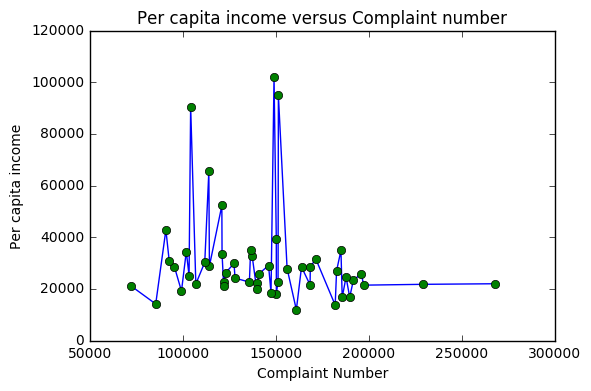

In [86]:
pl.plot(data_final['Complaint Number'], data_final['Per capita income (In 2014 Inflation Adjusted Dollars)'], '-')
pl.plot(data_final['Complaint Number'], data_final['Per capita income (In 2014 Inflation Adjusted Dollars)'], 'o')
pl.xlabel('Complaint Number')
pl.ylabel('Per capita income')
pl.title('Per capita income versus Complaint number')

#### Figure 1

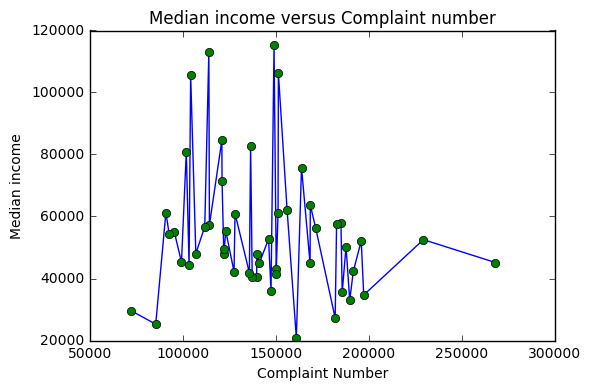

In [87]:
pl.plot(data_final['Complaint Number'], data_final['Median household income (In 2014 Inflation Adjusted Dollars)'], '-')
pl.plot(data_final['Complaint Number'], data_final['Median household income (In 2014 Inflation Adjusted Dollars)'], 'o')
pl.xlabel('Complaint Number')
pl.ylabel('Median income')
pl.title('Median income versus Complaint number')

#### Figure 2

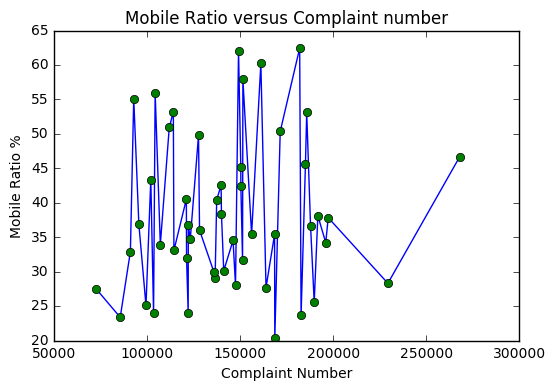

In [93]:
pl.plot(data_final['Complaint Number'], data_final['mobile_ratio'], '-')
pl.plot(data_final['Complaint Number'], data_final['mobile_ratio'], 'o')
pl.xlabel('Complaint Number')
pl.ylabel('Mobile Ratio %')
pl.title('Mobile Ratio versus Complaint number')

#### Figure 3

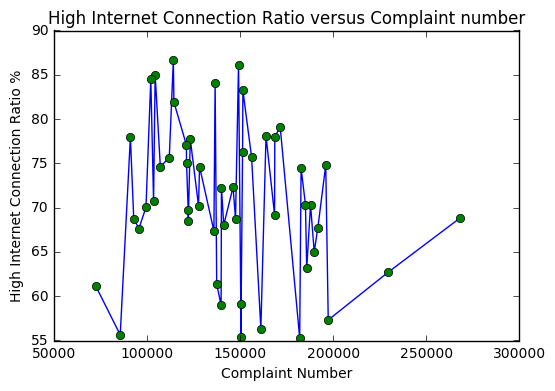

In [95]:
pl.plot(data_final['Complaint Number'], data_final['highinternet_ratio'], '-')
pl.plot(data_final['Complaint Number'], data_final['highinternet_ratio'], 'o')
pl.xlabel('Complaint Number')
pl.ylabel('High Internet Connection Ratio %')
pl.title('High Internet Connection Ratio versus Complaint number')

#### Figure 4

#### It is hard to detect any pattern from the graphs. For further work, I would conduct regression analysis to find out more about the relationship between the number of complaints and the demographic factors in each community district.